<a href="https://colab.research.google.com/github/aayam07/Clustering-ML-Models/blob/main/Copy_of_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

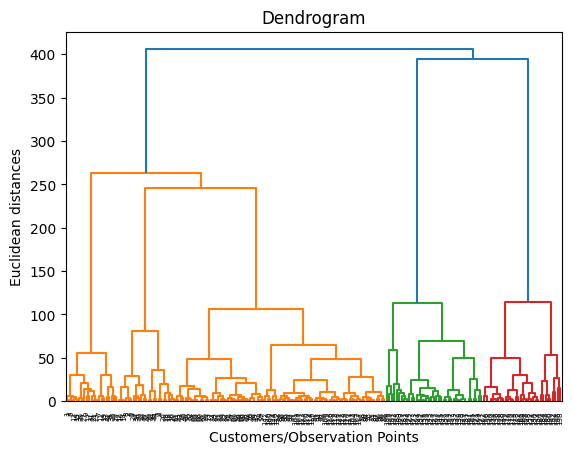

In [ ]:
import scipy.cluster.hierarchy as sch # import hierarchy module from the scipy library. hierarchy module contains the dendrogram function which we need
# dendrogram takes 1 argument i.e. the method you choose for your clustering that you link to your matrix of features 'X' in which you want to identify your clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # 'ward' is the name of the method for Minimum Variance. linkage function takes 2 arguments. First, the matrix of features inside which you want to identify your clusters. Second, the clustering technique. In HC, the most recommedned method is the method of Minimum Variance which brings the most relevant clusters. Minimum Variance will result in clusters in which the observation points won't vary too much or have among all of them a low variance i.e. this includes a method for minimizing variance for each of the clusters resulting from HC.
plt.title('Dendrogram')
plt.xlabel('Customers/Observation Points') # In x-axis of dendrogram, we should have all the observation points i.e rows (of customers in our dataset). And, y-axis will contain the Euclidean distance between each points/clusters
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = "euclidean", linkage = 'ward') # 5 is the optimal no of clusters obtained from Dendrogram above.
y_hc = hc.fit_predict(X) # here predict will also create the future dependent variable containing each of the customers the clusters they belong to. i.e returning the clusters to which each of the customers belong to


In [ ]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters

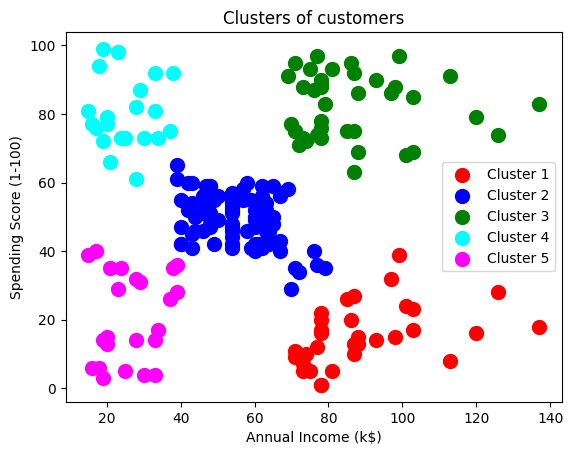

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()